In [1]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

In [2]:
def create_sinogram(tif_file, y_pixel):
    """
    Reads a 3D array from a .tif file and extracts a sinogram from the specified y_pixel.
    
    Parameters:
    tif_file (str): Path to the .tif file containing the 3D array of 2D projection images.
    y_pixel (int): The pixel index along the y-direction (horizontal slice) from which to take the sinogram.
    
    Returns:
    sinogram (2D numpy array): The extracted sinogram.
    """
    # Load the 3D array from the .tif file
    data = tiff.imread(tif_file)
    
    # Ensure the data is 3D
    if len(data.shape) != 3:
        raise ValueError("The provided .tif file does not contain a 3D array of 2D images.")
    
    # Extract the number of projections and the size of each 2D projection
    num_projections, img_height, img_width = data.shape
    
    # Ensure the y_pixel is valid
    if y_pixel < 0 or y_pixel >= img_height:
        raise ValueError(f"y_pixel must be between 0 and {img_height-1}. Provided value: {y_pixel}")
    
    # Extract the sinogram (horizontal line across the y_pixel for each projection)
    sinogram = data[:, y_pixel, :]
    
        # Plot the middle projection with the red line
    plt.figure()
    plt.imshow(data[0], cmap='gray')
    plt.axhline(y=y_pixel, color='red', linestyle='--', label=f'Line at y={y_pixel}')
    plt.title('Projection with Sinogram Line')
    plt.legend()
    
    return sinogram

def plot_sinogram(sinogram):
    """
    Plots the sinogram.
    
    Parameters:
    sinogram (2D numpy array): The sinogram to be plotted.
    """
    
    plt.figure()
    plt.imshow(sinogram, cmap='gray', aspect='auto')
    plt.colorbar()
    plt.title('Sinogram')
    plt.xlabel('Detector Pixel')
    plt.ylabel('Projection Angle')
    plt.show()

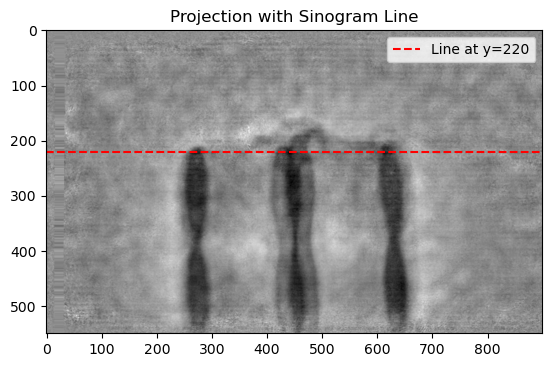

In [3]:
# Example usage
tif_file = "alignedProjections/aligned_iterateVMF_optFlow_sirt_20240905-223101.tif" # Replace with the actual path to your .tif file
y_pixel = 220  # Replace with the pixel value along the y direction where you want the sinogram

# Create the sinogram
sinogram = create_sinogram(tif_file, y_pixel)

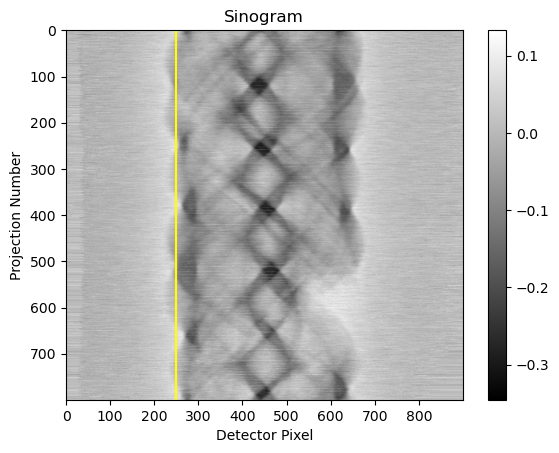

In [4]:
plt.figure()
plt.imshow(sinogram, cmap='gray', aspect='auto')
plt.colorbar()
plt.title('Sinogram')
plt.xlabel('Detector Pixel')
plt.ylabel('Projection Number')
plt.axvline(x=250, color='yellow', linestyle='-', label=f'Line at y={y_pixel}')

plt.show()